In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_excel(r'C:\Users\sg_cl\Desktop\masters subjects\DSRT 736\Fraud Dataset\LR\Salary_dataset.xlsx')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
# get the shape
print(df.shape)
print (df.head())

# checking the dataset
df.info()
df.describe()
print("Missing values:", df.isnull().sum())

(30, 3)
   Unnamed: 0  YearsExperience  Salary
0           0              1.2   39344
1           1              1.4   46206
2           2              1.6   37732
3           3              2.1   43526
4           4              2.3   39892
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 848.0 bytes
Missing values: Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64


In [ ]:
#df = df.drop('Merchant City', axis=1)

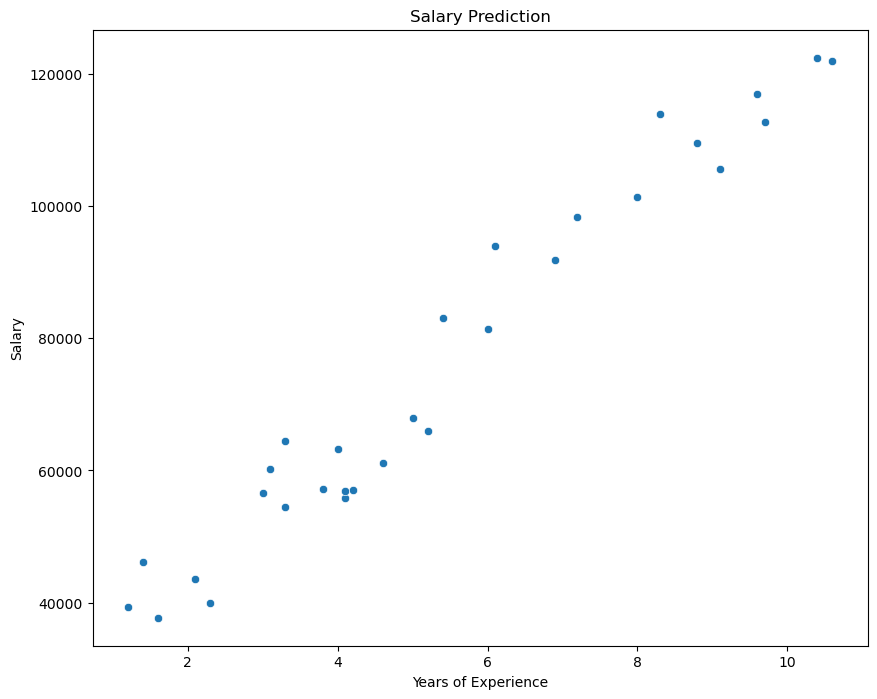

In [34]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['YearsExperience'],y=df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction')


plt.show()

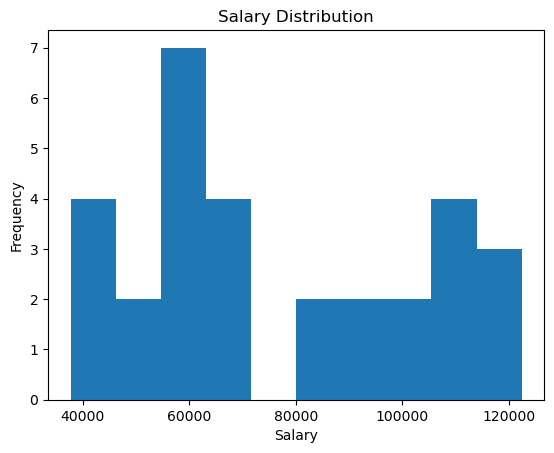

In [62]:
#Hsitogram
plt.hist(df["Salary"])
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Salary Distribution")
plt.show()

In [46]:
#Data pre processing String values to Int values
# Separate features (X) and labels (y)
print(df['Salary'].unique())
y = df['Salary']
X = df["YearsExperience"].values
X = X.reshape(-1,1)

print(X)
print(y)

[ 39344  46206  37732  43526  39892  56643  60151  54446  64446  57190
  63219  55795  56958  57082  61112  67939  66030  83089  81364  93941
  91739  98274 101303 113813 109432 105583 116970 112636 122392 121873]
[[ 1.2]
 [ 1.4]
 [ 1.6]
 [ 2.1]
 [ 2.3]
 [ 3. ]
 [ 3.1]
 [ 3.3]
 [ 3.3]
 [ 3.8]
 [ 4. ]
 [ 4.1]
 [ 4.1]
 [ 4.2]
 [ 4.6]
 [ 5. ]
 [ 5.2]
 [ 5.4]
 [ 6. ]
 [ 6.1]
 [ 6.9]
 [ 7.2]
 [ 8. ]
 [ 8.3]
 [ 8.8]
 [ 9.1]
 [ 9.6]
 [ 9.7]
 [10.4]
 [10.6]]
0      39344
1      46206
2      37732
3      43526
4      39892
5      56643
6      60151
7      54446
8      64446
9      57190
10     63219
11     55795
12     56958
13     57082
14     61112
15     67939
16     66030
17     83089
18     81364
19     93941
20     91739
21     98274
22    101303
23    113813
24    109432
25    105583
26    116970
27    112636
28    122392
29    121873
Name: Salary, dtype: int64


In [47]:
# Split the dataset into train and test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=20)

In [48]:
# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=42)

In [49]:
# Print the shapes of the resulting subsets
print("Training set shape:", X_train.shape, y_train.shape)
#print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (21, 1) (21,)
Test set shape: (9, 1) (9,)


In [50]:
# Create a linear regression model
model = LinearRegression()

In [51]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [52]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [60]:
#EValuate Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('mean square error:',mean_squared_error(y_test,y_pred))
print('mean absolute error',mean_absolute_error(y_test,y_pred))
print('r2_score:',r2_score(y_test,y_pred))
from sklearn.metrics import r2_score

# Assuming y_true contains the true target values and y_pred contains the predicted values
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


# Intecept and coeff of the line
print('Intercept of the model:',model.intercept_)
print('Coefficient of the line:',model.coef_)

mean square error: 31885663.26105884
mean absolute error 4667.73725130089
r2_score: 0.9625652477199742
R2 Score: 0.9625652477199742
Intercept of the model: 24783.69045651322
Coefficient of the line: [9622.64600551]


 y_pred: [ 65198.80367965  46915.77626919  38255.39486423  63274.27447855
 126783.73811492  64236.5390791   82519.56648957 118123.35670996
 109462.975305  ]
 y_test: 13     57082
4      39892
1      46206
10     63219
29    121873
12     56958
18     81364
27    112636
24    109432
Name: Salary, dtype: int64


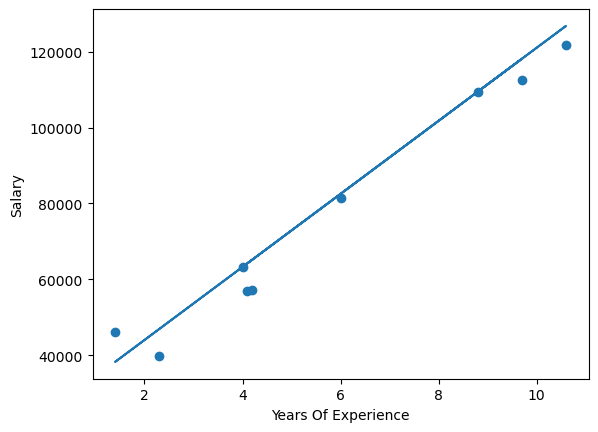

In [58]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")
plt.plot

correlation_matrix = df.corr()
correlation_matrix

# implementing ridge and lasso regression
from sklearn.linear_model import Ridge, Lasso

rd = Ridge()
rd.fit(X_train,y_train)
rd.score(X_test,y_test)

ls = Lasso()
ls.fit(X_train,y_train)
ls.score(X_test,y_test)

print(" y_pred:",  y_pred)
print(" y_test:",  y_test)

In [ ]:
X_test = X_test.drop(['y_pred','y_pred_binary'], axis=1)

In [ ]:
X_test['y_pred'] = model.predict(X_test)
# Set a threshold
Yes
X_test['y_pred_binary'] = [1 if val >= threshold else 0 for val in X_test['y_pred']]

In [ ]:
X_test[X_test['y_pred_binary']==1]#.head

In [ ]:
print( y_pred)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
print(y_pred)
# Set a threshold
threshold = 0.01

# Convert predictions to binary classes based on the threshold
y_pred_binary = [1 if val >= threshold else 0 for val in y_pred]

# Print the binary predictions
print("Binary Predictions:", y_pred_binary)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

In [ ]:
# Select an example for validation (optional)
example_index = 542
example_features = X.iloc[example_index]
example_target = y[example_index]

# Make predictions on the example
example_prediction = model.predict([example_features])

# Compare with actual value
print("Example features:", example_features)
print("Example target:", example_target)
print("Example prediction:", example_prediction)

# Find the indices where the predictions are 1
indices_with_value_1 = np.where(y_pred_binary == 1)

# Print the indices or the predictions themselves
print("Indices with value 1:", indices_with_value_1)
print("Predictions with value 1:", y_pred_binary[indices_with_value_1])

# Calculate mean squared error on the test set (optional)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_binary)
print("Mean Squared Error:", mse)
print(y_pred)

In [ ]:
counts = y_pred_binary.value_counts()